## Inicjalizacja środowiska programistycznego

In [159]:
#Color printing
from termcolor import colored

#General data operations library
import math
import numpy as np

#The tensorflow library
import tensorflow  as tf

#Plotting libraries
import matplotlib as mpl
import matplotlib.pyplot as plt

#Increase plots font size
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (10, 7),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

#append path with python modules
import importlib
import sys
sys.path.append("../modules")

#Private functions
import plotting_functions as plf
importlib.reload(plf)

import quadratic_equation as qef
importlib.reload(qef);
''''
##Restrict to selected GPU
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only use the first GPU
  try:
    tf.config.set_visible_devices(gpus[1], 'GPU')
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
  except RuntimeError as e:
    # Visible devices must be set before GPUs have been initialized
    print(e)'''

'\'\n##Restrict to selected GPU\ngpus = tf.config.list_physical_devices(\'GPU\')\nif gpus:\n  # Restrict TensorFlow to only use the first GPU\n  try:\n    tf.config.set_visible_devices(gpus[1], \'GPU\')\n    logical_gpus = tf.config.list_logical_devices(\'GPU\')\n    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")\n  except RuntimeError as e:\n    # Visible devices must be set before GPUs have been initialized\n    print(e)'

<br/><br/>
<br/><br/>

<h1 align="center">
 Uczenie maszynowe II
</h1>

<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>

<h1 align="right">
Artur Kalinowski <br>
Uniwersytet Warszawski <br>
Wydział Fizyki <br>    
</h1>

# Architektura gęsta/w pełni połączona - ang. dense/fully connected, FCN

Standardowa architektura sieci neuronowej to wiele warstw następujących **sekwencyjnie** po sobie.

* warstwy ukryte mają zwykle funkcję aktywacji ReLu:

```Python
tf.keras.layers.Dense(nNeurons, activation="relu", name="layer_{}".format(iLayer))(x)
```

* warstwy wyjściowe mają zwykle funkcję aktywacji:
    * **liniową** - dla zagadnienia regresji:
      <br></br>
      
      ```Python
      tf.keras.layers.Dense(nNeurons, activation="linear", name="layer_{}".format(iLayer))(x)
      ```

     <br></br>
    * **softmax** - dla zagadnienia klasyfikacji:
      <br></br>
      ```Python
       tf.keras.layers.Dense(nNeurons, activation="softmax", name="layer_{}".format(iLayer))(x)
      ```
      <br></br>

Funkcje podawane a konstruktorze można określać, używając nazwy lub podając obiekt funkcji explicite:
```Python
tf.keras.layers.Dense(nNeurons, activation="relu", name="layer_{}".format(iLayer))(x)
tf.keras.layers.Dense(nNeurons, activation=tf.keras.activations.relu, name="layer_{}".format(iLayer))(x)
```

W architekturze gęstej dana warstwa przyjmuje jako wejście wyjście z warstwy poprzedniej. Wyjątkiem jest oczywiście warstwa wejściowa.

Warstwa gęsta, `tf.keras.layers.Dense` przyjmuje wiele argumentów sterujących:
```Python
tf.keras.layers.Dense(
    units,                    # liczba neuronów
    activation=None,          # funkcja aktywacji
    use_bias=True,            # flaga sterująca obecnością wyrazu wolnego: w*x+b
    kernel_initializer='glorot_uniform',# rozkład prawdopodobieństwa dla początkowych wartości wag
    bias_initializer='zeros', # rozkład prawdopodobieństwa dla początkowych wartości wyrazów wolnych
    kernel_regularizer=None,  # funkcja regularyzyjąca wartości wag
    bias_regularizer=None,    # funkcja regularyzyjąca wartości wyrazów wolnych
    activity_regularizer=None,# funkcja regularyzyjąca wartość wyjściową neuronu
    kernel_constraint=None,   # funkcja nakładająca ograniczenia na wartości wag
    bias_constraint=None,     # funkcja nakładająca ograniczenia na wartości wyrazów wolnych
)
```

Sieć neuronowa złożona z
* warstwy wejściowej przyjmującej `nInputs` zmiennych
* dwu warstw ukrytych o `nNeurons` neuronach (jednostkach)
* warstwy wyjściowej o `nOutputNeurons` neuronach

In [160]:
nInputs = 4
nNeurons = 3
nOutputNeurons = 1

inputs = tf.keras.Input(shape=(nInputs,), name="features")

layer1 = tf.keras.layers.Dense(nNeurons, name="layer_1")(inputs)
layer2 = tf.keras.layers.Dense(nNeurons, name="layer_2")(layer1)

outputs = tf.keras.layers.Dense(nOutputNeurons, name = "output")(layer2)

model = tf.keras.Model(inputs=inputs, outputs=outputs, name="DNN")
tf.keras.utils.plot_model(model, 'fig_png/ML_model.png', show_shapes=True)
model.summary()

Model: "DNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ features (InputLayer)           │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_1 (Dense)                 │ (None, 3)              │            15 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_2 (Dense)                 │ (None, 3)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

Definicję modelu dużo wygodniej jest jednak zadać w pętli.

**Proszę:**

Napisać funkcję `getModel()`,

```Python
getModel(inputShape, nNeurons, hiddenActivation="relu", outputActivation="linear", nOutputNeurons=1)
```

która przyjmuje następujące argumenty:

* kształt danych wejściowych: `inputShape`
* listę zwierającą liczby neuronów w kolejnych warstwach, włączając warstwę wyjściową: `nNeurons = [64,32,16,8]`
* funkcje aktywacji dla warstw ukrytych i wyjściowej: `hiddenActivation, outputActivation` z odpowiednimi wartościami domyślnymi
* liczbę neuronów wyjściowych: `nOutputNeurons` z domyślną wartością `1`

Następnie proszę zainicjalizować zmienną `model` używając funkcji `getModel()` i wypisać podsumowanie modelu używając metody `summary()`

In [162]:
def getModel(inputShape, nNeurons, lr, hiddenActivation='relu', outputActivation="linear", nOutputNeurons=1):
    inputs = tf.keras.Input(shape=(inputShape,), name="features")
    x = inputs
    for iLayer, n in enumerate(nNeurons):
        x = tf.keras.layers.Dense(n, activation=hiddenActivation, 
                                  kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev = 0.05),
                                  bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                                  name="layer_"+str(iLayer))(x)
        
    outputs = tf.keras.layers.Dense(nOutputNeurons, name = "output")(x)
    model = tf.keras.Model(inputs=inputs, outputs=outputs, name="DNN")
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                  loss=tf.keras.losses.MeanSquaredError(),
                  metrics=['MeanAbsolutePercentageError','RootMeanSquaredError'])
    return model

nInputs = 128
nNeurons = [64, 32, 16, 8]
model = getModel(nInputs, nNeurons, lr=0.001)
model.summary()
pass

Model: "DNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ features (InputLayer)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_0 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_3 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,009 (43.00 KB)

 Trainable params: 11,009 (43.00 KB)

 Non-trainable params: 0 (0.00 B)

**Proszę:**

* korzystając z funkcji `getModel(...)` zbudować model z jedną warstwą ukrytą o 1024 neuronach i jednej cesze wejściowej
* ustawić inicjalizację wag na gaussowską:
  
```Python
tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05)
  
```
* ustawić inicjalizację wyrazu wolnego według rozkładu płaskiego w zakresie `[-1,1]`:
  
```Python
tf.keras.initializers.RandomUniform(minval=-1, maxval=1)

```
* narysować histogram wartości wag
* narysować histogram wartości wyrazów wolnych

**Wskazówka:** proszę zwrócić uwagę na kształt macierzy wag i wyrazów wolnych przy rysowaniu histogramu

Model: "DNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ features (InputLayer)           │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_0 (Dense)                 │ (None, 1024)           │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │         1,025 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,073 (12.00 KB)

 Trainable params: 3,073 (12.00 KB)

 Non-trainable params: 0 (0.00 B)

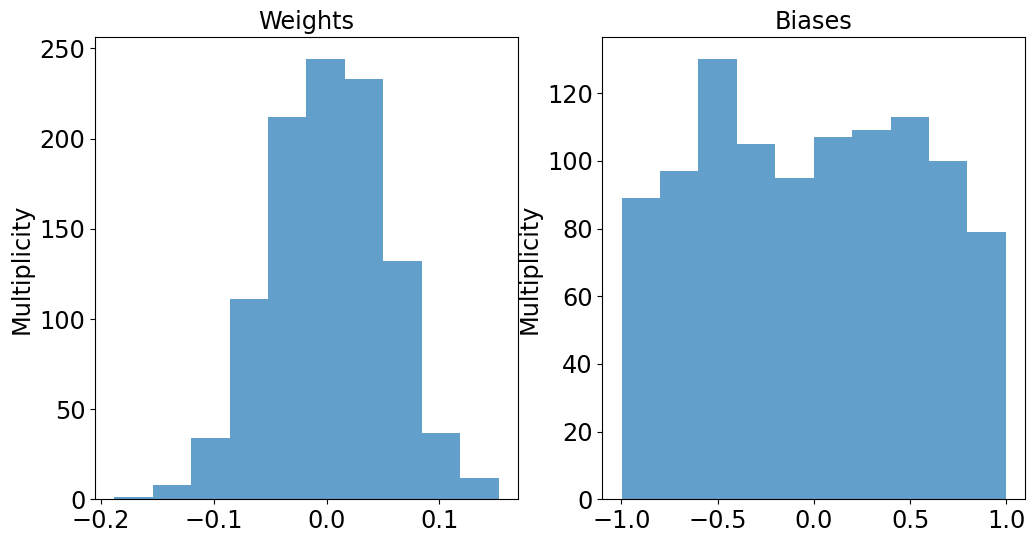

In [165]:
nNeurons = [1024]
nInputs = 1
model = getModel(nInputs, nNeurons, lr=0.001)
model.summary()

weights = model.get_layer('layer_0').weights[0].numpy()[0,:]
biases = model.get_layer('layer_0').weights[1].numpy()[:]

fig, axis = plt.subplots(1, 2, figsize=(12, 6))
axis[0].hist(weights.flatten(), bins=10, alpha=0.7)
axis[0].set_title("Weights")
axis[0].set_ylabel("Multiplicity")
axis[1].hist(biases, bins=10, alpha=0.7)
axis[1].set_title("Biases")
axis[1].set_ylabel("Multiplicity")
pass

Domyślnie wagi warstwy gęstej są inicjalizowane za pomocą rozkładu płaskiego w zakresie `[-w, w]` gdzie
$$
\Large{
w = \frac{\sqrt{6}}{nInput + nOutput}
}
$$

```Python
tf.keras.initializers.GlorotUniform(seed=None)
```

Inicjalizacja typu Glorot (nazwa on nazwiska osoby, która ją zaproponowała) poprawia zbieżność uczenia. W szczególności redukuje efekty
* **zanikania gradientu** - sieć w pewnym momencie, przestaje się uczyć, pomimo ewidentnego niedopasowania do danych
* **wybuchania gradientu** - w pewnym momencie sieć zaczyna zwracać NaN

W niektórych źródłach dla funkcji aktywacji ReLU jest polecana wersja `He uniform`:

$$
\Large{
w = \frac{\sqrt{6}}{nInput}
}
$$

**Proszę:**

* zdefiniować pojedynczą warstwę o 1 neuronie i 12 cechach wejściowych w zakresie `[0,1]`
* użyć domyślnej inicjalizacji wag i wyrazu wolnego
* przygotować 10 000 przykładów o 12 losowych cechach danych rozkładem płaskim w zakresie `[0,1]`
* narysować histogram wartości cech wejściowych
* narysować histogram wartości wyjściowej warstwy
* powtórzyć procedurę dla  wykładnicznego rozkładu cech

**Pytanie**: dlaczego rozkład wartości warstwy jest, jaki jest?

In [167]:
import tensorflow as tf

print("Czy GPU jest dostępne:", tf.config.list_physical_devices('GPU'))

Czy GPU jest dostępne: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


Output mean: -0.0737
Output standard deviation: 0.4934


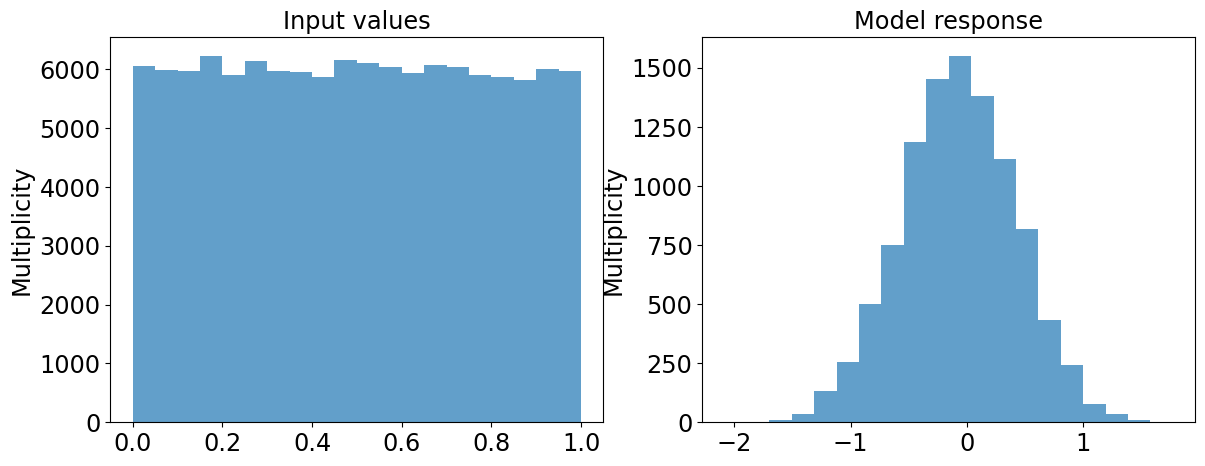

In [169]:
x = np.random.default_rng().uniform(0,1, (10000,12))

model = tf.keras.layers.Dense(1)
y_pred = model(x)

fig, axis = plt.subplots(1, 2, figsize=(14, 5))

axis[0].hist(x.flatten(), bins=20, alpha=0.7)
axis[0].set_title("Input values")
axis[0].set_ylabel("Multiplicity")
axis[1].hist(y_pred[:,0], bins=20, alpha=0.7)
axis[1].set_title("Model response")
axis[1].set_ylabel("Multiplicity")

print(colored("Output mean:","blue"), "{:3.4f}".format(tf.math.reduce_mean(y_pred)))
print(colored("Output standard deviation:","blue"), "{:3.4f}".format(tf.math.reduce_std(y_pred)))
pass

Output mean: -1.6544
Output standard deviation: 1.3452


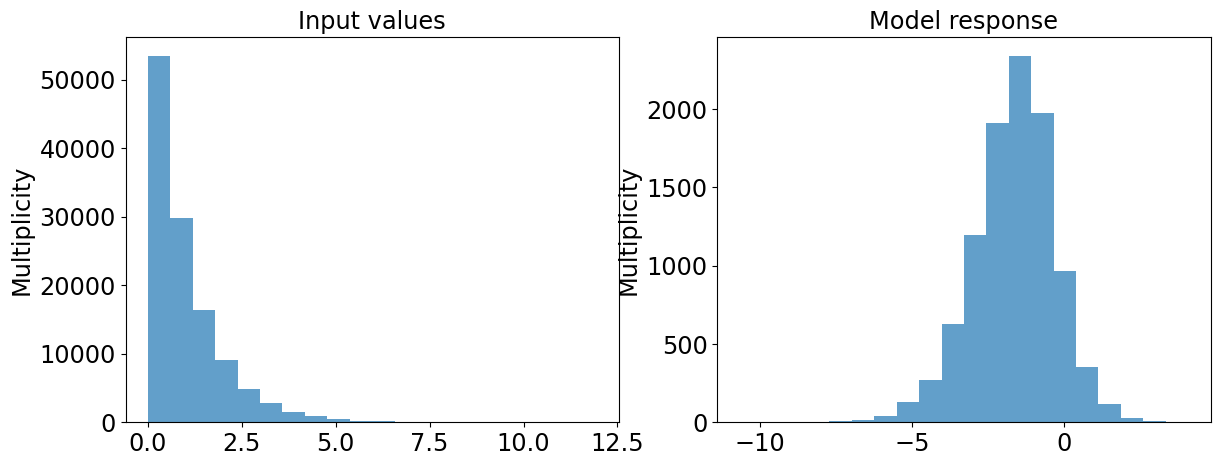

In [170]:
x = np.random.default_rng().exponential(1, (10000,12))

model = tf.keras.layers.Dense(1)
y_pred = model(x)

fig, axis = plt.subplots(1, 2, figsize=(14, 5))

axis[0].hist(x.flatten(), bins=20, alpha=0.7)
axis[0].set_title("Input values")
axis[0].set_ylabel("Multiplicity")
axis[1].hist(y_pred[:,0], bins=20, alpha=0.7)
axis[1].set_title("Model response")
axis[1].set_ylabel("Multiplicity")

print(colored("Output mean:","blue"), "{:3.4f}".format(tf.math.reduce_mean(y_pred)))
print(colored("Output standard deviation:","blue"), "{:3.4f}".format(tf.math.reduce_std(y_pred)))
pass

## Rekonstrukcja funkcji schodkowej

**Proszę:**

* wygenerować 256 par $(x,y)$, gdzie:
    * $x$ - liczby losowe zadane rozkładem płaskim w zakresie $[0,1]$
    *
    $$
    \huge{
    y =
    \begin{cases}
      1 & \text{gdy x>0 i x<0.5} \\
      0 & \text{w każdym innym przypadku}
      \end{cases}
    }
    $$
  

* podzielić dane na dwa równe zbiory: treningowy i walidacyjny
* ze zbioru walidacyjnego usunąć punkty na schodku: `|x-0.5|<0.01`
* zdefiniować i wytrenować sieć neuronową, która odtwarza zależność `y(x)`
* narysować ewolucję funkcji straty na zbiorach testowym i walidacyjnym używając funkcji `plotHistory()` z modułu `plotting_functions`
* narysować punkty `danych` i wynik modelu na zbiorze treningowym
* narysować punkty `danych` i wynik modelu na zbiorze walidacyjnym
* modyfikując parametry sieci znaleźć model, który na zbiorze walidacyjnym uzyska precyzję lepszą niż $1\cdot10^{-2}$, gdzie precyzja jest zdefiniowana jako:
$$
\huge{
\delta = \max{|f(x) - Y|}
}
$$

**Wskazówka:** proszę eksperymentować z liczbą warstw, liczbą neuronów, parametrem uczenia, funkcją aktywacji itd.

Zestaw danych uczących:

In [171]:
nPoints = 256
x = np.random.default_rng().uniform(0,1, (nPoints,1))
y = (x>0)*(x<0.5)
y = y.astype(np.float64)
nHalf = int(nPoints/2)
x_train, y_train = x[:nHalf,:], y[:nHalf,:]
x_val, y_val = x[nHalf:,:], y[nHalf:,:]
mask = np.abs(x_val-0.5)>1E-2
x_val = x_val[mask].reshape(-1,1)
y_val = y_val[mask].reshape(-1,1)
pass

Inicjalizacja i trening modelu

In [172]:
inputShape = 1
nNeurons = np.full((8,), 32)
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate,
                decay_steps=200,
                decay_rate=0.95,
                staircase=True)


model = getModel(inputShape, nNeurons, lr_schedule)
model.summary()



history = model.fit(x_train, y_train, epochs=2000, batch_size=32, validation_data=(x_val, y_val), verbose=0)

print(history.history.keys())

Model: "DNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ features (InputLayer)           │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_0 (Dense)                 │ (None, 32)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_1 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_2 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_3 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_4 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_5 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_6 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_7 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,489 (29.25 KB)

 Trainable params: 7,489 (29.25 KB)

 Non-trainable params: 0 (0.00 B)

2025-04-02 23:34:22.790432: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


dict_keys(['MeanAbsolutePercentageError', 'RootMeanSquaredError', 'loss', 'val_MeanAbsolutePercentageError', 'val_RootMeanSquaredError', 'val_loss'])


Testowania modelu:

2025-04-02 23:36:59.821649: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 179ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Delta for trining 0.2807384133338928
Delta for validation 0.020965576171875


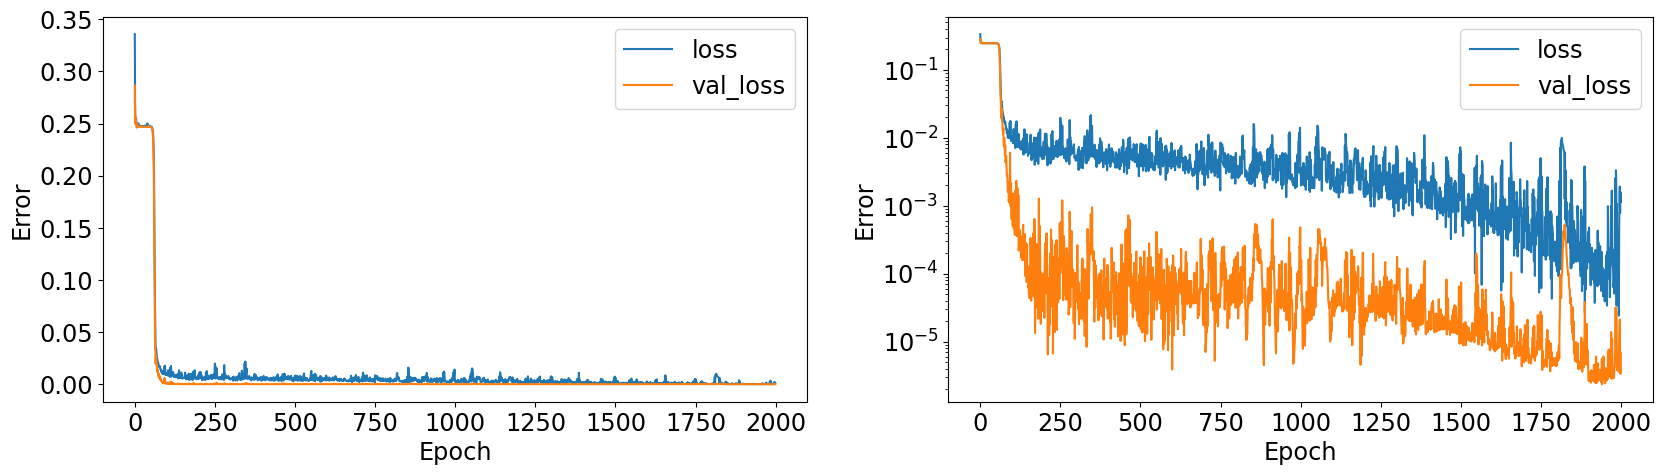

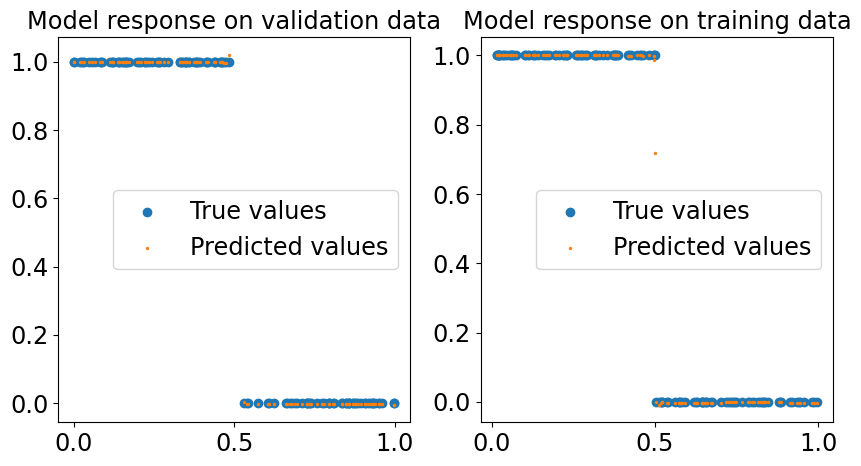

In [173]:
y_pred = model.predict(x_val)
y_pred_train = model.predict(x_train)

plf.plotTrainHistroy(history)  


fig, axis = plt.subplots(1, 2, figsize=(10, 5))
axis[0].scatter(x_val, y_val, label="True values")
axis[0].scatter(x_val, y_pred, label="Predicted values", s=2)
axis[0].set_title("Model response on validation data")
axis[0].legend()
axis[1].scatter(x_train, y_train, label="True values")
axis[1].scatter(x_train, y_pred_train, label="Predicted values", s=2)
axis[1].set_title("Model response on training data")
axis[1].legend()


print(colored("Delta for trining", 'blue'), np.max(np.abs(y_pred_train-y_train)))
print(colored("Delta for validation", 'blue'), np.max(np.abs(y_pred-y_val)))

**Proszę:**

* narysować powiększenie rysunku z danymi i wynikiem modelu dla obszaru przed schodkiem: x$\in$[0.41, 0.51], y$\in$[0.99, 1.01]
* narysować powiększenie rysunku z danymi i wynikiem modelu dla obszaru za schodkiem: x$\in$[0.49, 0.61], y$\in$[-0.01, 0.01]

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


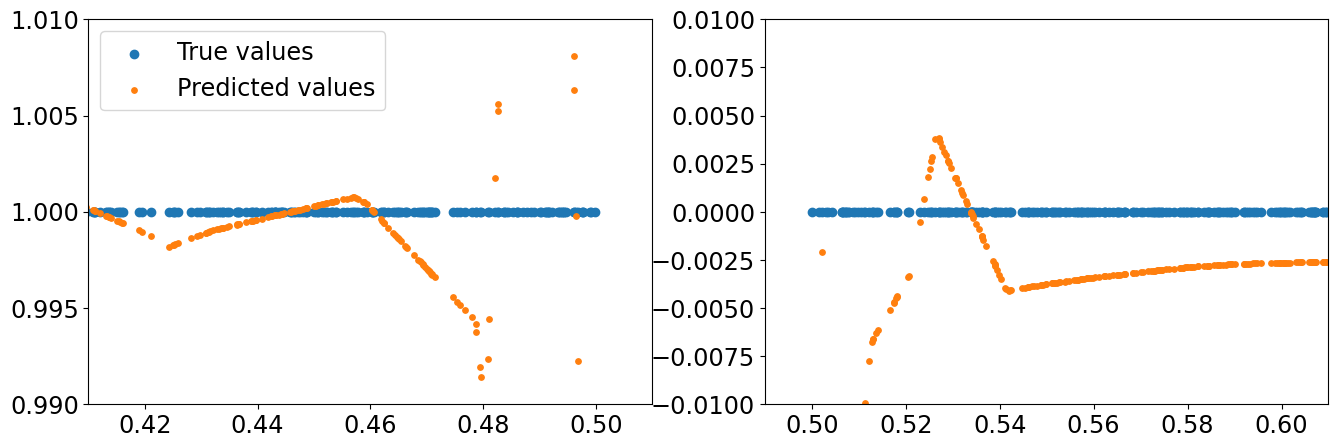

In [174]:
x_val = np.random.default_rng().uniform(0,1, (2000,1))
y_val = (x_val>0)*(x_val<0.5)
y_val = y_val.astype(np.float64)
y_pred = model.predict(x_val)

fig, axis = plt.subplots(1, 2, figsize=(16, 5))
axis[0].scatter(x_val, y_val, label="True values")
axis[0].scatter(x_val, y_pred, label="Predicted values", s=15)
axis[0].set_xlim(0.41, 0.51)
axis[0].set_ylim(0.99, 1.01)
axis[0].legend()
axis[1].scatter(x_val, y_val, label="True values")
axis[1].scatter(x_val, y_pred, label="Predicted values", s=15)
axis[1].set_xlim(0.49, 0.61)
axis[1].set_ylim(-0.01, 0.01)
pass

**Proszę:**

* narysować dane i odpowiedź modelu w zakresie poza obszarem użytym do treningu: x$\in$[-5,5]

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


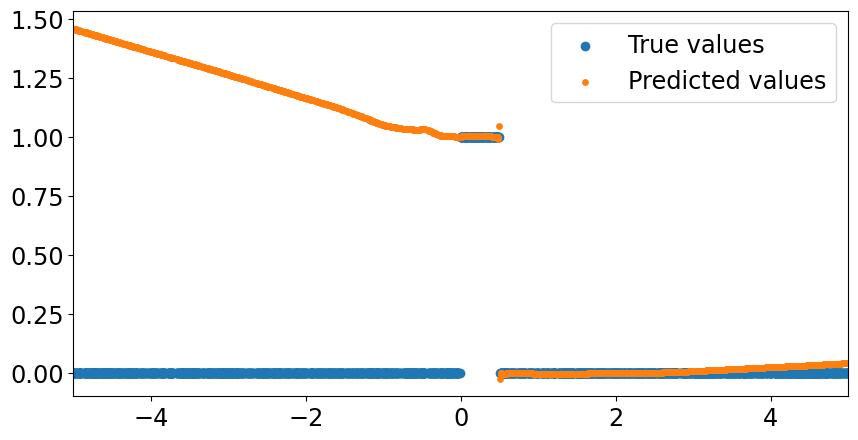

In [175]:
x_val = np.random.default_rng().uniform(-5,5, (2000,1))
y_val = (x_val>0)*(x_val<0.5)
y_val = y_val.astype(np.float64)
y_pred = model.predict(x_val)

fig, axis = plt.subplots(1, 1, figsize=(10, 5))
axis.scatter(x_val, y_val, label="True values")
axis.scatter(x_val, y_pred, label="Predicted values", s=15)
axis.set_xlim(-5, 5)
axis.legend()
pass

## Sieć rozwiązująca równane kwadratowe.

**Proszę:**

Przygotować zbiór danych dotyczących rozwiązywania równania kwadratowego:

* x - współczynniki równania w zakresie [-1,1]$^{3}$
* y - rozwiązywalność równania: `True/False`.
* ustawić kształt zmiennej `y` na `(-1,1)`
* użyć po 1000 przykładów zbioru uczącego i 10000 dla walidacyjnego
* wypisać na ekran kształty danych.

In [176]:
nPoints = 1000
x_train = qef.quadraticEqGenerator(nPoints)
y_train = np.all(qef.quadraticEqSolution(x_train)!=None, axis=1).reshape(-1,1)
nPointsval = 10000
x_val = qef.quadraticEqGenerator(nPointsval)
y_val = np.all(qef.quadraticEqSolution(x_val)!=None, axis=1).reshape(-1,1)
print(colored("Training data shapes: ","blue"), x_train.shape, y_train.shape)
print(colored("Validation data shapes: ","blue"), x_val.shape, y_val.shape)

Training data shapes:  (1000, 3) (1000, 1)
Validation data shapes:  (10000, 3) (10000, 1)


/Users/jakubkusmierski/Desktop/Uczenie_Maszynowe_2/modules/quadratic_equation.py:21: RuntimeWarning: invalid value encountered in sqrt
  result = np.where(delta>0, np.sqrt(delta), 0.0)


**Proszę:**

* wytrenować sieć, która odpowiada na pytanie: **Czy równanie ma rozwiązania?**
* spróbować uzyskać na zbiorze walidacyjnym poprawną odpowiedź w >99% przypadków
* kod trenujący powinien być zawarty w funkcji `quadraticEqMLSolver(x_train, y_train, x_val, y_val)` i zawierać:
    * definicję modelu - z użyciem funkcji `getModel(...)`
    * harmonogram zmiany współczynika uczenia
    * trening **bez** wywołania wczesnego zatrzymania, ale z definicją odpowiednich metryk:
    ```Python
    
    metrics=['Accuracy','FalsePositives']
    ```
    <br></br>
    * rysowane historii funkcji straty
    * wypisanie dokładności, `accuracy` i `false positive rate` obliczonych na zbiorze walidacyjnym z użyciem metody `evaluate`:
      ```Python
      
      model.evaluate(x_train, y_train)
      model.evaluate(x_val, y_val)
      ```
      <br></br>
* funkcja `quadraticEqMLSolver(x_train, y_train, x_val, y_val)` powinna zwracać wytrenowany model

**Wskazówka:** jaka powinna być funkcja aktywacji neuronu wyjściowego?  

Model:

In [187]:
def getModel(inputShape, nNeurons, lr, hiddenActivation='relu', outputActivation='linear', outputNeurons=1, metrics=['MeanAbsolutePercentageError','RootMeanSquaredError']):
    inputs = tf.keras.Input(shape=(inputShape,), name="features")
    x = inputs
    for iLayer, n in enumerate(nNeurons):
        x = tf.keras.layers.Dense(n, activation=hiddenActivation, 
                                  kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev = 0.05),
                                  bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                                  name="layer_"+str(iLayer))(x)
            
    outputs = tf.keras.layers.Dense(outputNeurons, activation=outputActivation, name = "output")(x)
    model = tf.keras.Model(inputs=inputs, outputs=outputs, name="DNN")
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                  loss=tf.keras.losses.MeanSquaredError(),
                  metrics=metrics)
    return model

InputShape = 3
nNeurons = np.array([64, 64, 64])
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate,
                decay_steps=200,
                decay_rate=0.95,
                staircase=True)
model = getModel(InputShape, nNeurons, lr_schedule, metrics=['Accuracy', 'FalsePositives'], outputActivation='sigmoid')
model.summary()

Model: "DNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ features (InputLayer)           │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_0 (Dense)                 │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

In [188]:
%%time
def quadraticEqMLSolver(x_train, y_train, x_val, y_val, model, epochs=200):
    #Training
    model.summary()
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=32, validation_data=(x_val, y_val), verbose=0)

    #Plotting
    plf.plotTrainHistroy(history)
    
    print(colored('Evaluate for training: ', 'blue'), model.evaluate(x_train, y_train))
    val_loss, val_acc, val_fpr = model.evaluate(x_val, y_val)
    val_fpr /= np.sum(1-y_val)
    
    print(colored('Accuracy for validation: ', 'blue'), val_acc)
    print(colored('False positives rate for validation: ', 'blue'), val_fpr)
    return model

CPU times: user 3 μs, sys: 11 μs, total: 14 μs
Wall time: 16.2 μs


Model: "DNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ features (InputLayer)           │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_0 (Dense)                 │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

2025-04-02 23:54:13.693499: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - Accuracy: 0.9837 - FalsePositives: 3.5152 - loss: 0.0128
Evaluate for training:  [0.01271231472492218, 0.9869999885559082, 6.0]
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Accuracy: 0.9760 - FalsePositives: 54.7834 - loss: 0.0170
Accuracy for validation:  0.9775000214576721
False positives rate for validation:  0.026677231907025884


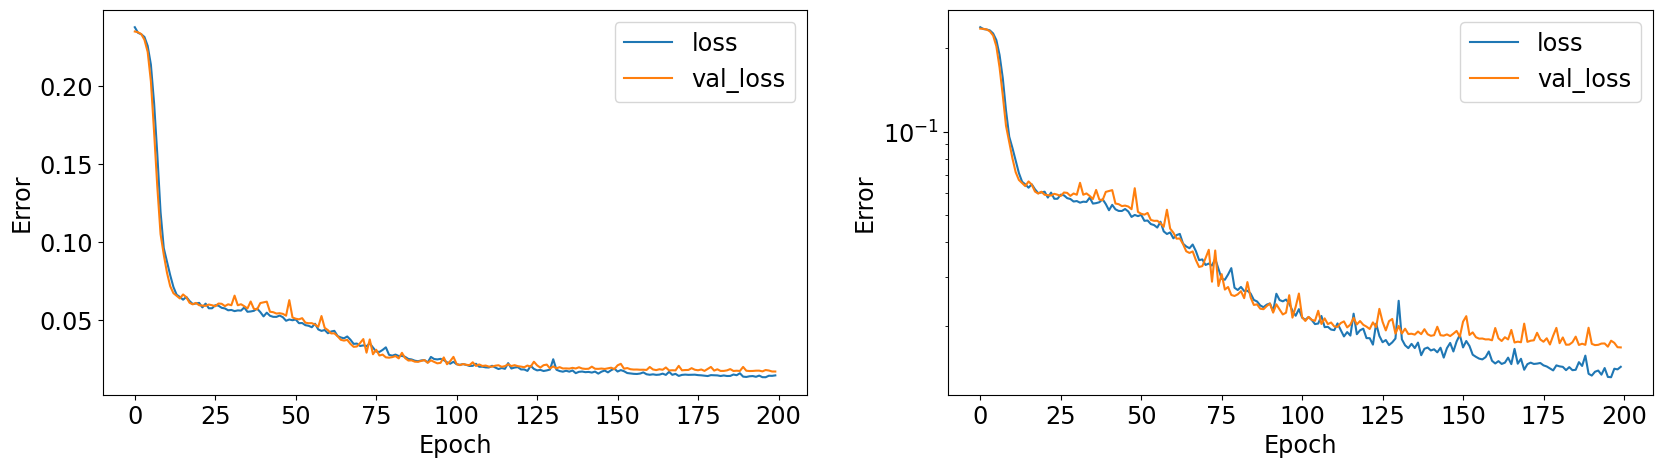

In [189]:
model_1 = quadraticEqMLSolver(x_train, y_train, x_val, y_val, model, epochs=200)

<img border="0" alt="overtraining"
    src="attachment:abeda6fd-e27e-426e-ade7-50338a6b5ffd.png"
    width="600" height="600" align="left">

**przetrenowanie:** model dopasowuje się do konkretnych wartości
obecnych w zbiorze uczącym, ale słano się `generalizuje` - reaguje na
nowe wartości nieobecne w zbiorze uczącycm.

**typowy objaw:** funkcja straty maleje na zbiorze uczącym, ale zatrzymuje się, lub nawet zaczyna rosnąć na zbiorze testowym.

**lekarstwa:**

* zwiększenie zbioru uczącego
* regularyzacja modelu

**Proszę:**

* zwiększyć rozmiar próbki uczącej do 10 000 przykładów i przeprowadzić trening ponownie
* trening zajmnie kilka minut - proszę go uruchomić w czasie przerwy

Training data shapes:  (10000, 3) (10000, 1)
Validation data shapes:  (10000, 3) (10000, 1)


/Users/jakubkusmierski/Desktop/Uczenie_Maszynowe_2/modules/quadratic_equation.py:21: RuntimeWarning: invalid value encountered in sqrt
  result = np.where(delta>0, np.sqrt(delta), 0.0)


Model: "DNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ features (InputLayer)           │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_0 (Dense)                 │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,924 (101.27 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,283 (67.52 KB)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Accuracy: 0.9850 - FalsePositives: 38.9013 - loss: 0.0131
Evaluate for training:  [0.011969269253313541, 0.9866999983787537, 72.0]
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Accuracy: 0.9808 - FalsePositives: 59.7325 - loss: 0.0132
Accuracy for validation:  0.9830999970436096
False positives rate for validation:  0.028817667654187987
CPU times: user 22min 50s, sys: 14min 46s, total: 37min 37s
Wall time: 22min 11s


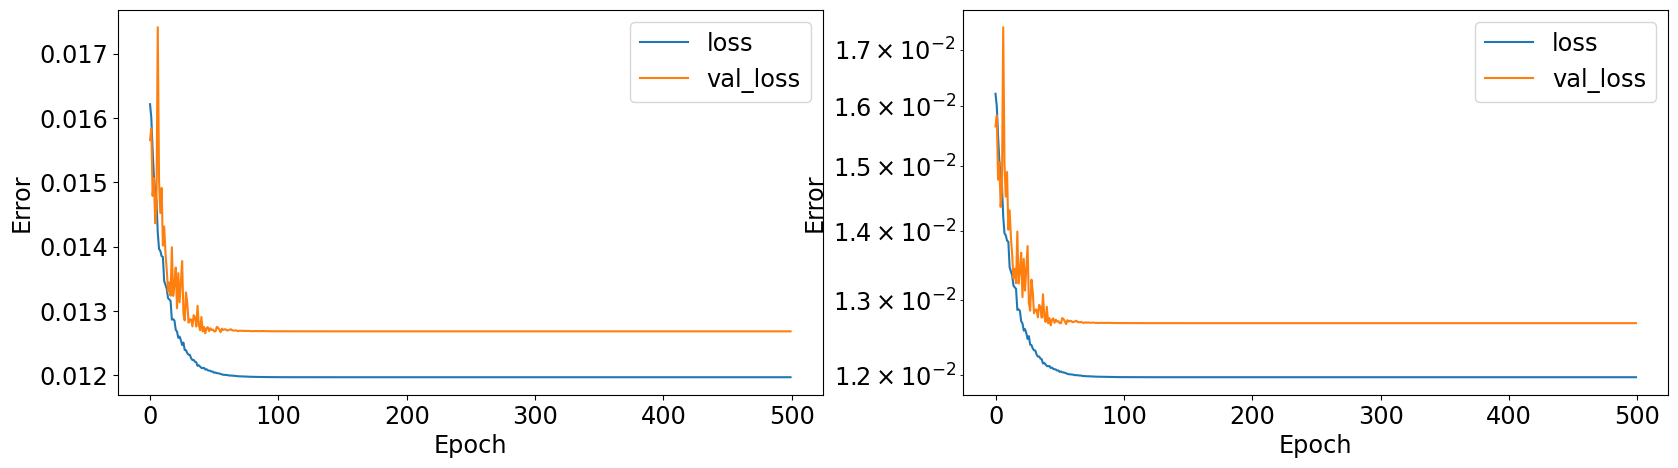

In [190]:
%%time
nPoints = 10000
x_train = qef.quadraticEqGenerator(nPoints)
y_train = np.all(qef.quadraticEqSolution(x_train)!=None, axis=1).reshape(-1,1)
nPointsval = 10000
x_val = qef.quadraticEqGenerator(nPointsval)
y_val = np.all(qef.quadraticEqSolution(x_val)!=None, axis=1).reshape(-1,1)
print(colored("Training data shapes: ","blue"), x_train.shape, y_train.shape)
print(colored("Validation data shapes: ","blue"), x_val.shape, y_val.shape)

model = quadraticEqMLSolver(x_train, y_train, x_val, y_val, model, epochs=500);
pass

## Regularyzacja wag

Standardową procedurą przeciwdziałającą przeuczeniu jest nałożenie ograniczeń na wartości wag. Dwa najbardziej popularne warianty to:

* **regularyzacja L1:**
$$
\huge{
\sum |w_{i}| < C
}
$$

* **regularyzacja L2:**
$$
\huge{
\sum w_{i}^{2} < C
}
$$

Regularyzacja `l1` może sprowadzić niektóre wagi modelu do `0`, czego nie robi `l2`.

Formalnie regularyzację zadaje się poprzez dodanie mnożnika Largange'a do funkcji straty.
W przypadku regularyzacji L2 funkcja straty ma postać:
$$
\huge{
L_{\text regularised} = L_{\text raw} +  \lambda \cdot \sum w_{i}^{2}
}
$$

Regularyzacja może być różna dla każdej warstwy, więc definiuje się ją w konstruktorze warstwy:
```Python
tf.keras.layers.Dense(
    units,
    activation=None,
    use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    kernel_regularizer=tf.keras.regularizers.L2(l2=0.01)  # regularyzacja wag
)
```

**Proszę:**

* wrócić do zbiorów treningowego i walidacyjnego o **1000 elementach**
* w warstwach ukrytych użyć regularyzacji L2
* poeksperymentować z wartością $\lambda$

**Wskazówki:**
* można zmodyfikować funkcję generującą model
* model może utykać w stanie słabego wytrenowania - to jest zjawisko `umierania neuronów` - neurony utykają w stanie z zerowym gradientem.

Model:

In [191]:
def getModel(inputShape, nNeurons, lr, hiddenActivation='relu', outputActivation='linear', outputNeurons=1, metrics=['MeanAbsolutePercentageError','RootMeanSquaredError'], kernel_regularizer=None):
    inputs = tf.keras.Input(shape=(inputShape,), name="features")
    x = inputs
    for iLayer, n in enumerate(nNeurons):
        x = tf.keras.layers.Dense(n, activation=hiddenActivation, 
                                  kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev = 0.05),
                                  bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                                  kernel_regularizer=kernel_regularizer,
                                  name="layer_"+str(iLayer))(x)
            
    outputs = tf.keras.layers.Dense(outputNeurons, activation=outputActivation, name = "output")(x)
    model = tf.keras.Model(inputs=inputs, outputs=outputs, name="DNN")
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                  loss=tf.keras.losses.MeanSquaredError(),
                  metrics=metrics)
    return model

InputShape = 3
nNeurons = np.array([64, 64, 64])
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate,
                    decay_steps=200,
                    decay_rate=0.95,
                    staircase=True)
karnel_regularization = tf.keras.regularizers.L2(l2 = 0.01)
model = getModel(InputShape, nNeurons, lr_schedule, metrics=['Accuracy', 'FalsePositives'], outputActivation='sigmoid', kernel_regularizer=karnel_regularization)
model.summary()

Model: "DNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ features (InputLayer)           │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_0 (Dense)                 │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

Training data shapes:  (1000, 3) (1000, 1)
Validation data shapes:  (10000, 3) (10000, 1)


/Users/jakubkusmierski/Desktop/Uczenie_Maszynowe_2/modules/quadratic_equation.py:21: RuntimeWarning: invalid value encountered in sqrt
  result = np.where(delta>0, np.sqrt(delta), 0.0)


Model: "DNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ features (InputLayer)           │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_0 (Dense)                 │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

2025-04-03 00:32:39.885168: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - Accuracy: 0.6537 - FalsePositives: 186.0606 - loss: 0.2264
Evaluate for training:  [0.22600936889648438, 0.6549999713897705, 345.0]
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Accuracy: 0.6308 - FalsePositives: 1860.8917 - loss: 0.2332
Accuracy for validation:  0.6251000165939331
False positives rate for validation:  1.0
CPU times: user 1min 39s, sys: 1min 17s, total: 2min 56s
Wall time: 1min 57s


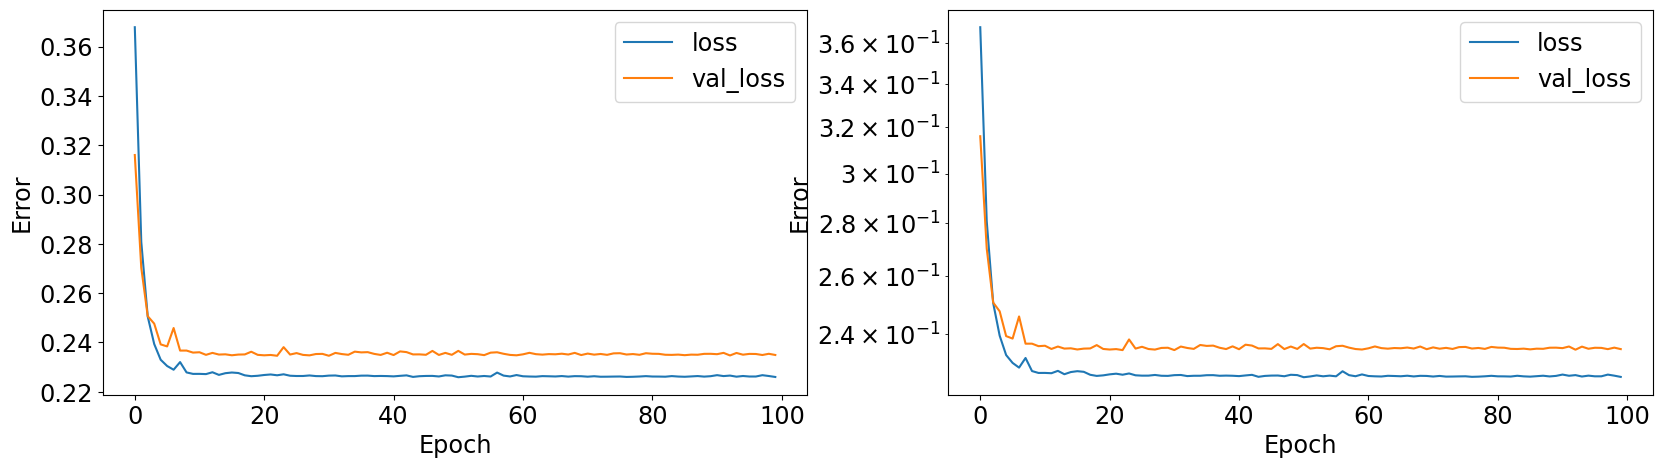

In [192]:
%%time
nPoints = 1000
x_train = qef.quadraticEqGenerator(nPoints)
y_train = np.all(qef.quadraticEqSolution(x_train)!=None, axis=1).reshape(-1,1)
nPointsval = 10000
x_val = qef.quadraticEqGenerator(nPointsval)
y_val = np.all(qef.quadraticEqSolution(x_val)!=None, axis=1).reshape(-1,1)
print(colored("Training data shapes: ","blue"), x_train.shape, y_train.shape)
print(colored("Validation data shapes: ","blue"), x_val.shape, y_val.shape)

model = quadraticEqMLSolver(x_train, y_train, x_val, y_val, model, epochs=100);
pass

## Regularyzacja przez porzucanie neuronów (ang. dropout)

Inną metodą regularyzacji niż nakładanie warunków na wagi może być wprowadzenie zaburzeń do sieci w czasie treningu.
Najbardziej popularną metodą jest losowe wyłączanie niektórych neuronów, ang. `dropout`.

Algorytm porzucania jest sterowany przez parametr `dropout_rate` który okleśla jaki ułamek neuronów będzie wyłączony w każdej iteracji
pętlu uczącej. **W każdej iteracji są porzucane losowe neurony**.

Porzucanie jest zaimplementowane jako dedykowana warstwa, która odcina wyjście z porzuconych neuronów w poprzedniej warstwie:
```Python
tf.keras.layers.Dropout(
    rate, noise_shape=None, seed=None, **kwargs
)
```

**Uwaga:** porzucanie jest aktywne tylko w czasie treningu. Jeśli używamy metod typu  `model.fit()`, `model.predict()` odpowiedni tryb jest ustawiany automatycznie. Bezpośrednie sterowanie trybem można uzyskać przez wartość parametru `training` operatora `()` modelu:
```Python
model(x_test, training=True)
```
Niestety operator `()` nie działa dla paczek danych. Jeśli chcemy przetwarzać paczki danych trzeba ustawić parametr `training` bezpośrednio dla warstw.

In [193]:
def getModel(inputShape, nNeurons, lr, hiddenActivation='relu', outputActivation='linear', outputNeurons=1, metrics=['MeanAbsolutePercentageError','RootMeanSquaredError'], kernel_regularizer=None):
    inputs = tf.keras.Input(shape=(inputShape,), name="features")
    x = inputs
    for iLayer, n in enumerate(nNeurons):
        x = tf.keras.layers.Dense(n, activation=hiddenActivation, 
                                  kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev = 0.05),
                                  bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                                  kernel_regularizer=kernel_regularizer,
                                  name="layer_"+str(iLayer))(x)
        x = tf.keras.layers.Dropout(name="dropout_layer_"+str(iLayer), rate = 0.2)(x)
            
    outputs = tf.keras.layers.Dense(outputNeurons, activation=outputActivation, name = "output")(x)
    model = tf.keras.Model(inputs=inputs, outputs=outputs, name="DNN")
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                  loss=tf.keras.losses.MeanSquaredError(),
                  metrics=metrics)
    return model

InputShape = 3
nNeurons = np.array([64, 64, 64])
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate,
                    decay_steps=200,
                    decay_rate=0.95,
                    staircase=True)
model = getModel(InputShape, nNeurons, lr_schedule, metrics=['Accuracy', 'FalsePositives'], outputActivation='sigmoid')
model.summary()

Model: "DNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ features (InputLayer)           │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_0 (Dense)                 │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_layer_0 (Dropout)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_layer_1 (Dropout)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_layer_2 (Dropout)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

Model: "DNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ features (InputLayer)           │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_0 (Dense)                 │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_layer_0 (Dropout)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_layer_1 (Dropout)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_layer_2 (Dropout)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

2025-04-03 00:36:45.838805: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - Accuracy: 0.9168 - FalsePositives: 32.7273 - loss: 0.0556
Evaluate for training:  [0.055369116365909576, 0.9179999828338623, 61.0]
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Accuracy: 0.9261 - FalsePositives: 269.7771 - loss: 0.0531
Accuracy for validation:  0.9229999780654907
False positives rate for validation:  0.1435049346492398
CPU times: user 1min 26s, sys: 1min 5s, total: 2min 31s
Wall time: 1min 40s


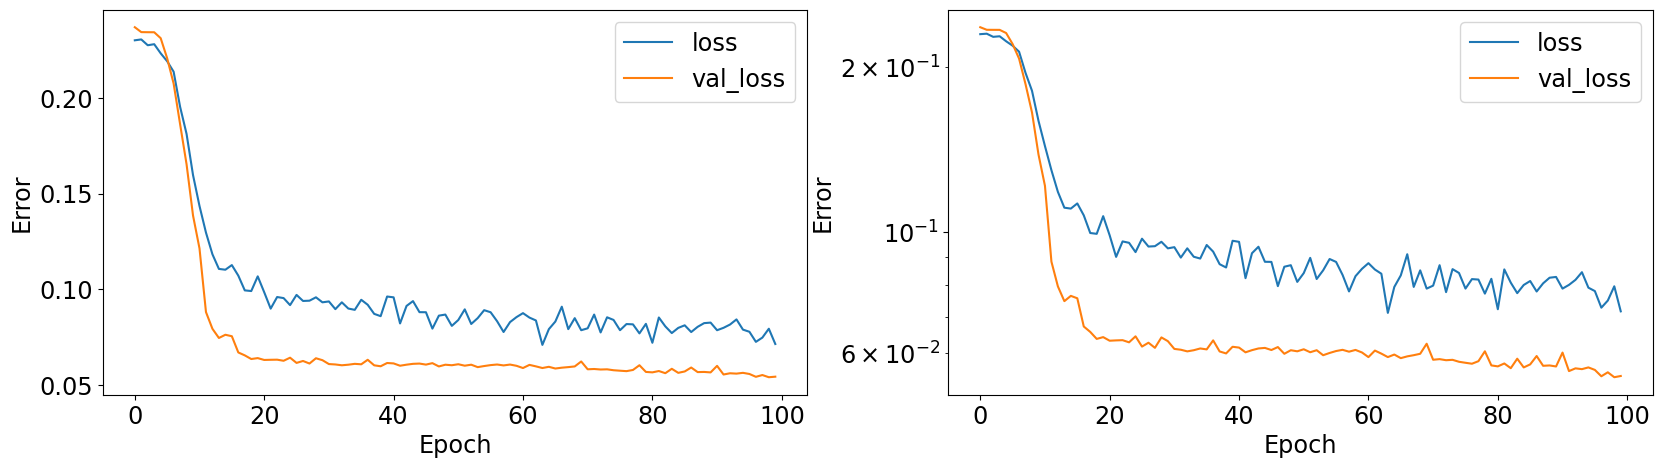

In [194]:
%%time
model = quadraticEqMLSolver(x_train, y_train, x_val, y_val, model, epochs=100);
pass

## Regularyzacja Monte Carlo

Regularyzacja przez porzucanie tworzy de facto losowe sieci w każdej iteracji - sieci różnią się listą aktywnych neuronów.
Ten fakt można wykorzystać do stworzenia zespołu (komitetu) sieci w czasie predykcji - wystarczy aktywować warstwy opuszczające w czasie predykcji.
Obliczając średnią z odpowiedzi wielu wariantów sieci możemy zredukować błąd sieci oraz oszacować rozrzut jej wyników.

**Proszę:**

* wytrenować model z regularyzacją L2 i opuszczaniem warstw. Można skorzystać z modelu wytrenowanego w poprzedniej komórce
* stworzyć zbiór 100 odpowiedzi modeli z warstwami opuszczającymi włączonymi na czas predykcji
* odpowiedź komitetu zdefiniować jako:
    * opcję, która uzyska najwięcej głosów
    * opcję dla której średnie prawdopodobieństwo zwrócone przez modele jest większe niż 50%
* obliczyć dokładność i FPR dla zbioru walidacyjnego

**Wskazówki:**
* proszę zajrzeć do dokumentacji `tf.keras.Model` i sprawdzić jak włączyć stan taki jak w czasie treningu
* w trakcje rozwoju kodu można ustawić liczbę modeli na `1` by przyspieszyć pętlę `koduj-testuj`

In [195]:
def getModel(inputShape, nNeurons, lr, hiddenActivation='relu', outputActivation='linear', outputNeurons=1, metrics=['MeanAbsolutePercentageError','RootMeanSquaredError'], kernel_regularizer=None):
    inputs = tf.keras.Input(shape=(inputShape,), name="features")
    x = inputs
    for iLayer, n in enumerate(nNeurons):
        x = tf.keras.layers.Dense(n, activation=hiddenActivation, 
                                  kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev = 0.05),
                                  bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                                  kernel_regularizer=kernel_regularizer,
                                  name="layer_"+str(iLayer))(x)
        x = tf.keras.layers.Dropout(name="dropout_layer_"+str(iLayer), rate = 0.2)(x)
            
    outputs = tf.keras.layers.Dense(outputNeurons, activation=outputActivation, name = "output")(x)
    model = tf.keras.Model(inputs=inputs, outputs=outputs, name="DNN")
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                  loss=tf.keras.losses.MeanSquaredError(),
                  metrics=metrics)
    return model

InputShape = 3
nNeurons = np.array([64, 64, 64])
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate,
                    decay_steps=200,
                    decay_rate=0.95,
                    staircase=True)
karnel_regularization = tf.keras.regularizers.L2(l2 = 0.001)
model = getModel(InputShape, nNeurons, lr_schedule, metrics=['Accuracy', 'FalsePositives'], outputActivation='sigmoid', kernel_regularizer=karnel_regularization)
model.summary()

Model: "DNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ features (InputLayer)           │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_0 (Dense)                 │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_layer_0 (Dropout)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_layer_1 (Dropout)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_layer_2 (Dropout)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

Model: "DNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ features (InputLayer)           │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_0 (Dense)                 │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_layer_0 (Dropout)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_layer_1 (Dropout)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_layer_2 (Dropout)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

2025-04-03 00:39:14.948070: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - Accuracy: 0.9006 - FalsePositives: 31.8182 - loss: 0.0835
Evaluate for training:  [0.08231085538864136, 0.9049999713897705, 58.0]
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Accuracy: 0.9187 - FalsePositives: 255.4968 - loss: 0.0788
Accuracy for validation:  0.9154999852180481
False positives rate for validation:  0.13763670312083223


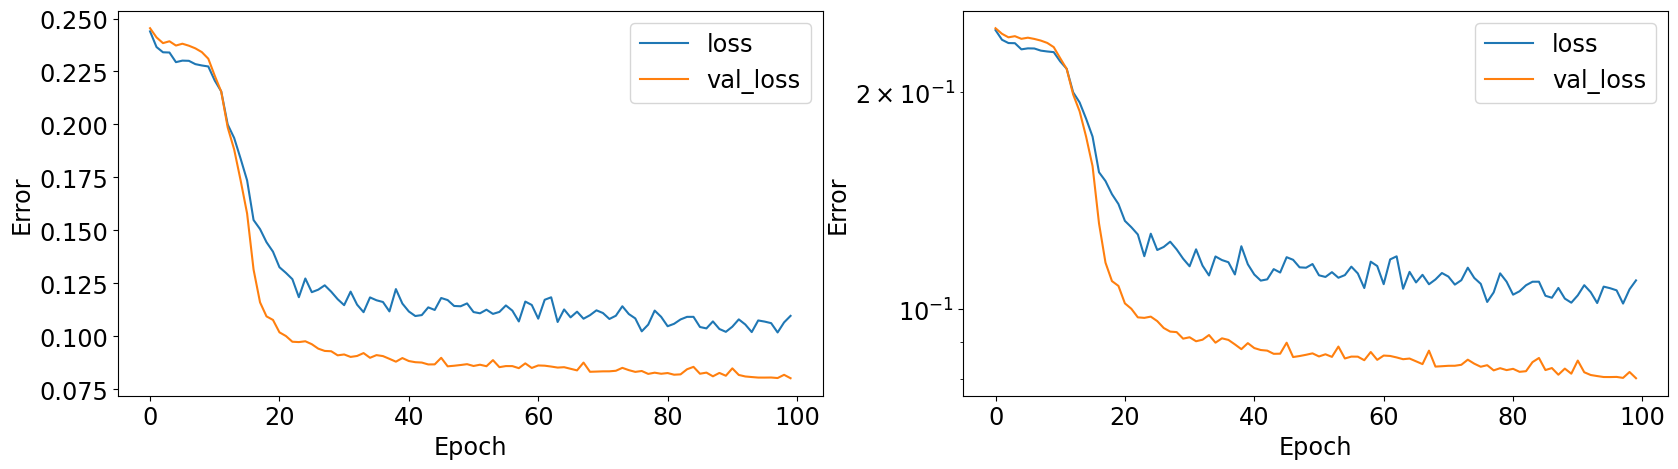

In [196]:
model = quadraticEqMLSolver(x_train, y_train, x_val, y_val, model, epochs=100);

In [205]:
%%time
nModels = 100

ensamble = np.stack([model(x_val, training=True) for iModel in range(nModels)])
print(ensamble.shape)
mean = np.mean(ensamble, axis=0)>0.5
std = np.std(ensamble, axis=0)

val_acc = np.mean(mean==y_val)
val_fpr = np.sum(mean*(1-y_val))/np.sum(1-y_val)
val_fnr = np.sum((1-mean)*y_val)/np.sum(y_val)
print(colored("Validation accuracy:","blue"),val_acc)
print(colored("Validation FPR","blue"),val_fpr)
print(colored("Validation FNR","blue"),val_fnr)
pass

(100, 10000, 1)
Validation accuracy: 0.917
Validation FPR 0.13443584955988264
Validation FNR 0.05215165573508239
CPU times: user 553 ms, sys: 355 ms, total: 909 ms
Wall time: 1.07 s


# Zadanie domowe

**Proszę:**

zbudować model, który będzie znajdował rozwiązania równania kwadratowego. Można przyjąć, że model otrzymuje jedynie równania które mają rozwiązania.

* proszę narysować histogram różnicy względnej:

  $$
   \delta = \frac{model - true}{true}
  $$
* proszę obliczyć wartość metryki:
  $$
  x = \text{ułamek przypadków dla których}~\delta<10^{-2}
  $$

Można próbować wszyskiego (poza oszukiwaniem), by uzyskać dobrą precyzję modeli. "Dobra" precyzja to $x>0.1$.

Jeśli wyniki nie będą spektakularne należy co najmniej uzasadnić, że model się uczy, tzn. wyniki modelu są w jakimś stopniu skorelowane z oczekiwanymi wartościami.

In [ ]:
#Input data preparation
...rozwiązanie...
pass

Training data shapes:  (11996, 3) (11996, 2)
Validation data shapes:  (10000, 3) (10000, 2)


Training dataset.
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Fraction of events with Y==Y_pred: 0.0005835278426142048
Fraction of examples with abs(pull)<0.01: 0.08
Pull standard deviation: 21.07
Validation dataset.
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 938us/step
Fraction of events with Y==Y_pred: 0.0002
Fraction of examples with abs(pull)<0.01: 0.07
Pull standard deviation: 1765.41
CPU times: user 38min 36s, sys: 1min 59s, total: 40min 36s
Wall time: 35min 6s


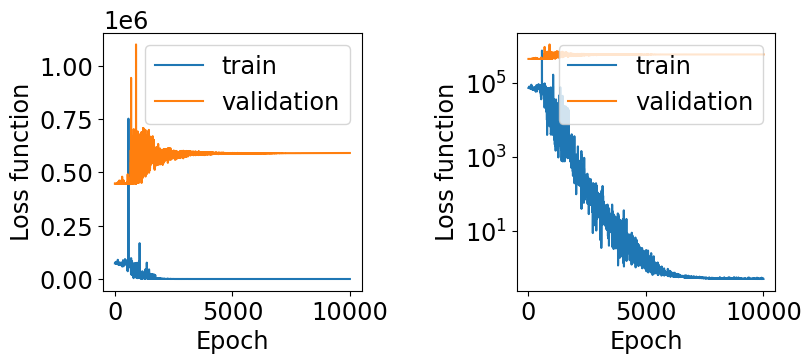

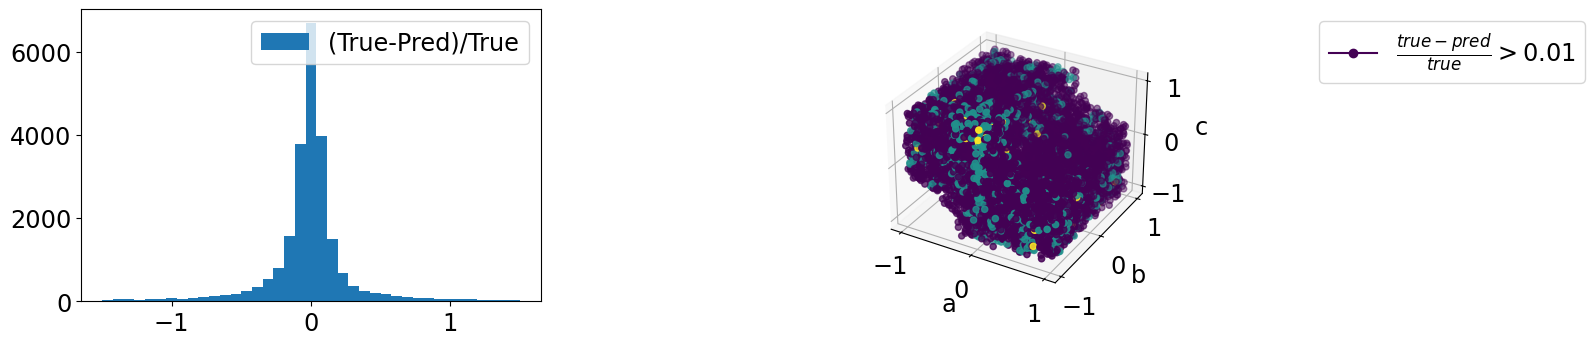

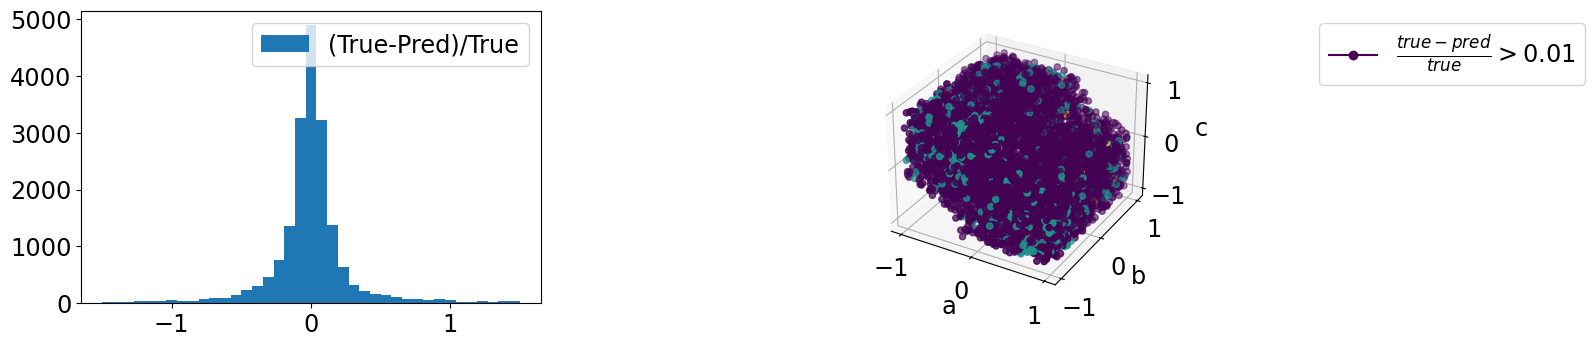

In [ ]:
%%time
#model definition and training
...rozwiązanie...
pass

I0000 00:00:1712656023.976299  126309 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_9', 232 bytes spill stores, 232 bytes spill loads

I0000 00:00:1712656024.761624  126305 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_9', 232 bytes spill stores, 232 bytes spill loads



Training dataset.
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Fraction of events with Y==Y_pred: 0.00012504168056018673
Fraction of examples with abs(pull)<0.01: 0.07
Pull standard deviation: 7.21
Validation dataset.
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step
Fraction of events with Y==Y_pred: 0.0001
Fraction of examples with abs(pull)<0.01: 0.08
Pull standard deviation: 6.99
CPU times: user 29.1 s, sys: 1.91 s, total: 31 s
Wall time: 27.5 s


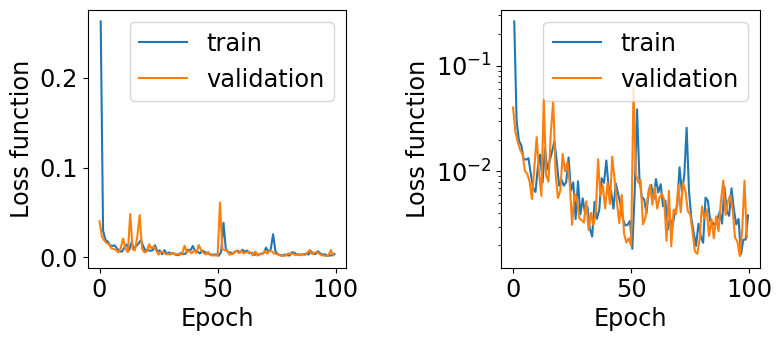

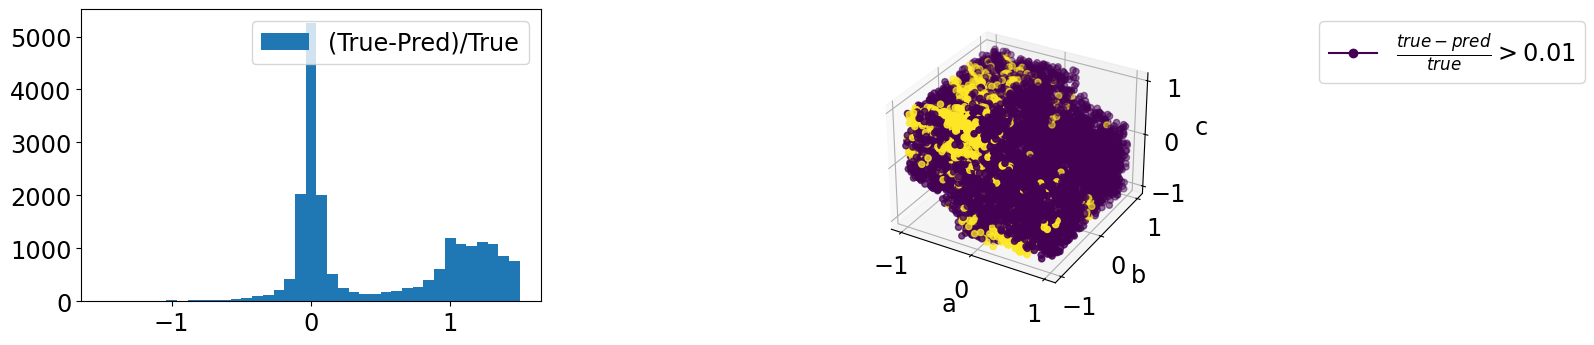

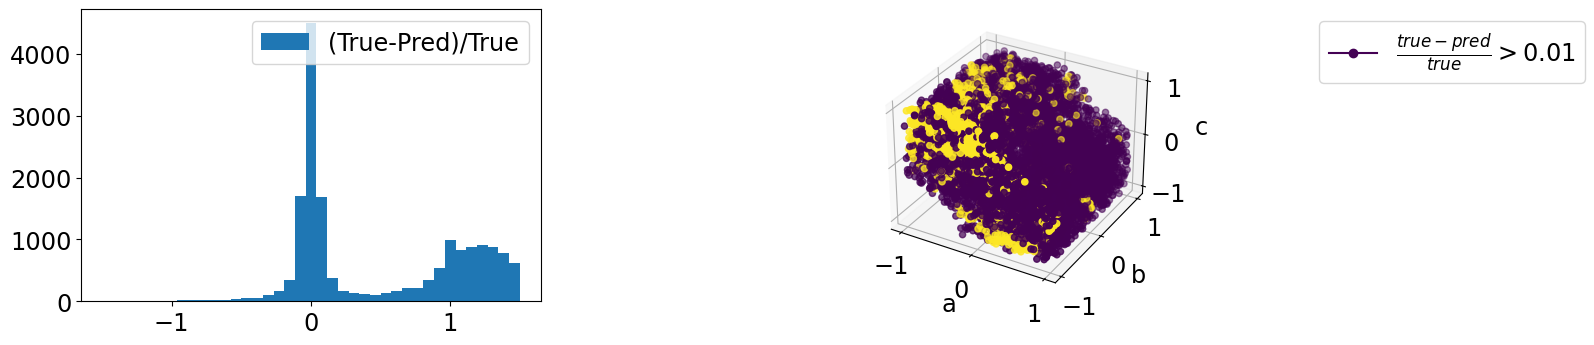

In [ ]:
%%time
...rozwiązanie...
pass